In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
# Load in the datasets
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_oil = pd.read_csv('../data/oil.csv')
df_holidays_events = pd.read_csv('../data/holidays_events.csv')
df_stores = pd.read_csv('../data/stores.csv')
df_transactions = pd.read_csv('../data/transactions.csv')

In [3]:
# Rename columns with same column names
df_stores = df_stores.rename(columns={'type': 'type_stores'})
df_holidays_events = df_holidays_events.rename(columns={'type': 'type_holidays_events'})

In [4]:
# Convert to datetime
df_train['date'] = pd.to_datetime(df_train['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [5]:
df = pd.merge(df_train, df_transactions, on=['date', 'store_nbr'], how='left')
df = pd.merge(df, df_stores, on='store_nbr', how='left')
df = pd.merge(df, df_oil, on='date', how='left')
df = pd.merge(df, df_holidays_events, on='date', how='left')

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', None)

# Task 1. Data Exploration

## a. Explore the dataset by displaying the first few rows, summary statistics, and data types of each column.

### Display the first 5 rows

In [7]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holidays_events,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


### Display the summary statistics for numerical columns

In [8]:
df.describe()

,id,date,store_nbr,sales,onpromotion,transactions,cluster,dcoilwtico
count,3054348.00,3054348,3054348.00,3054348.00,3054348.00,2805231.00,3054348.00,2099196.00
mean,1504276.78,2015-04-26 12:11:45.717619200,27.50,359.02,2.62,1697.07,8.48,68.02
min,0.00,2013-01-01 00:00:00,1.00,0.00,0.00,5.00,1.00,26.19
25%,754676.75,2014-03-01 00:00:00,14.00,0.00,0.00,1046.00,4.00,46.41
50%,1507571.50,2015-04-28 12:00:00,27.50,11.00,0.00,1395.00,8.50,53.43
75%,2255120.25,2016-06-22 00:00:00,41.00,196.01,0.00,2081.00,13.00,95.81
max,3000887.00,2017-08-15 00:00:00,54.00,124717.00,741.00,8359.00,17.00,110.62
std,866261.01,NaN,15.59,1107.29,12.25,966.83,4.65,25.69


### Display the data type of each column

In [9]:
df.dtypes

id                               int64
date                    datetime64[ns]
store_nbr                        int64
family                          object
sales                          float64
onpromotion                      int64
transactions                   float64
city                            object
state                           object
type_stores                     object
cluster                          int64
dcoilwtico                     float64
type_holidays_events            object
locale                          object
locale_name                     object
description                     object
transferred                     object
dtype: object

## b. Identify missing values, outliers, and unique values in categorical columns.

### Check for missing values

In [10]:
df.isnull().sum()

id                            0
date                          0
store_nbr                     0
family                        0
sales                         0
onpromotion                   0
transactions             249117
city                          0
state                         0
type_stores                   0
cluster                       0
dcoilwtico               955152
type_holidays_events    2551824
locale                  2551824
locale_name             2551824
description             2551824
transferred             2551824
dtype: int64

### Check for outliers
#### Start with visualizing the numerical data to get a picture of how the data looks in terms of distribution
##### Sales & promotion:
"Since the distribution is skewed with a very long tail, it's clear that there are outliers"

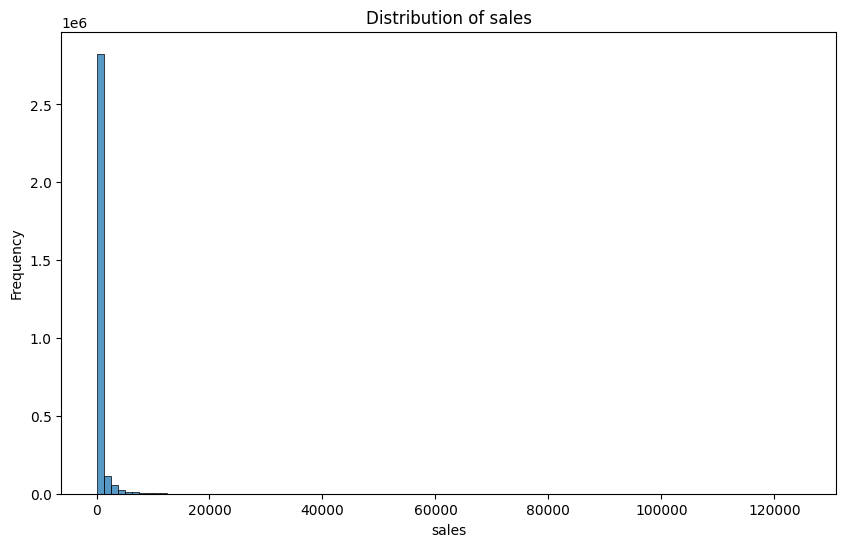

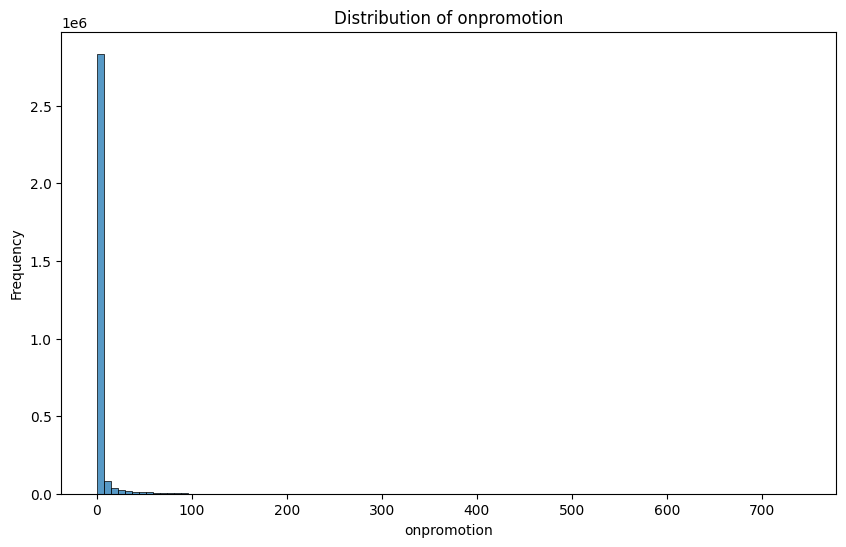

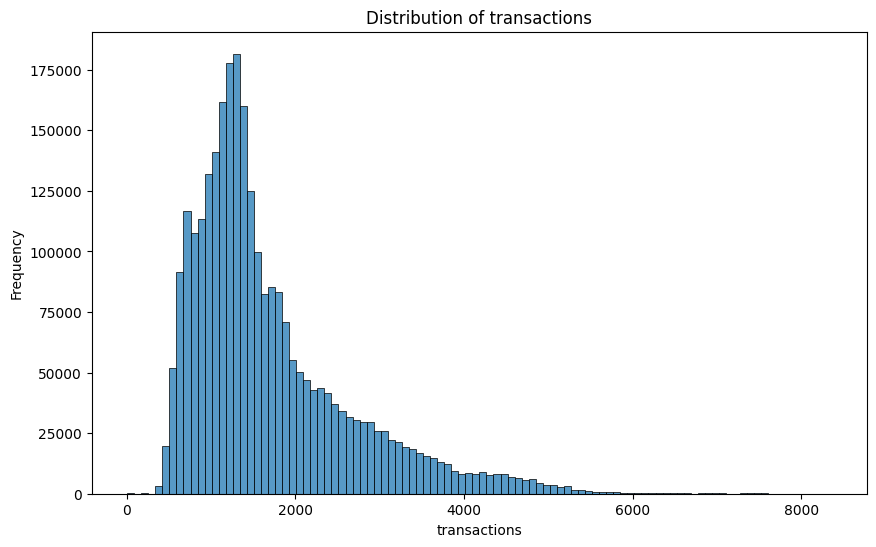

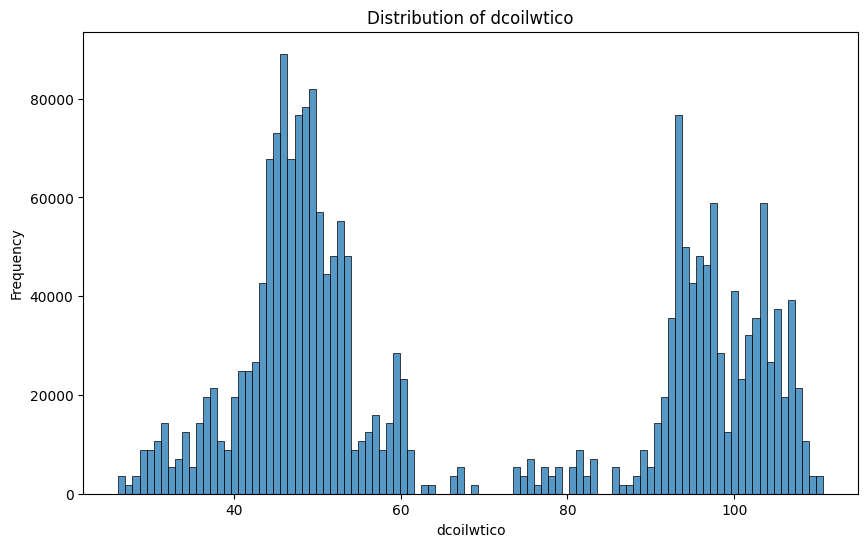

In [13]:
numerical_columns_of_interest = ['sales', 'onpromotion', 'transactions', 'dcoilwtico']

for column in numerical_columns_of_interest:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=100)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Check for unique values in categorical columns

In [24]:
display(
    HTML(
        pd.DataFrame(
            [
                {
                    "Column Name": column,
                    "Unique Values": ", ".join(map(str, df[column].unique())),
                }
                for column in df.select_dtypes(include=["object"]).columns
            ]
        ).to_html(index=False)
    )
)

Column Name,Unique Values
family,"AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOOKS, BREAD/BAKERY, CELEBRATION, CLEANING, DAIRY, DELI, EGGS, FROZEN FOODS, GROCERY I, GROCERY II, HARDWARE, HOME AND KITCHEN I, HOME AND KITCHEN II, HOME APPLIANCES, HOME CARE, LADIESWEAR, LAWN AND GARDEN, LINGERIE, LIQUOR,WINE,BEER, MAGAZINES, MEATS, PERSONAL CARE, PET SUPPLIES, PLAYERS AND ELECTRONICS, POULTRY, PREPARED FOODS, PRODUCE, SCHOOL AND OFFICE SUPPLIES, SEAFOOD"
city,"Quito, Cayambe, Latacunga, Riobamba, Ibarra, Santo Domingo, Guaranda, Puyo, Ambato, Guayaquil, Salinas, Daule, Babahoyo, Quevedo, Playas, Libertad, Cuenca, Loja, Machala, Esmeraldas, Manta, El Carmen"
state,"Pichincha, Cotopaxi, Chimborazo, Imbabura, Santo Domingo de los Tsachilas, Bolivar, Pastaza, Tungurahua, Guayas, Santa Elena, Los Rios, Azuay, Loja, El Oro, Esmeraldas, Manabi"
type_stores,"D, C, B, E, A"
type_holidays_events,"Holiday, nan, Work Day, Additional, Event, Transfer, Bridge"
locale,"National, nan, Local, Regional"
locale_name,"Ecuador, nan, Manta, Cotopaxi, Cuenca, Libertad, Riobamba, Puyo, Guaranda, Imbabura, Machala, Latacunga, El Carmen, Santo Domingo, Cayambe, Guayaquil, Esmeraldas, Ambato, Ibarra, Quevedo, Santo Domingo de los Tsachilas, Santa Elena, Quito, Loja, Salinas"
description,"Primer dia del ano, nan, Recupero puente Navidad, Recupero puente primer dia del ano, Carnaval, Fundacion de Manta, Provincializacion de Cotopaxi, Fundacion de Cuenca, Cantonizacion de Libertad, Cantonizacion de Riobamba, Viernes Santo, Dia del Trabajo, Dia de la Madre-1, Cantonizacion del Puyo, Dia de la Madre, Batalla de Pichincha, Cantonizacion de Guaranda, Provincializacion de Imbabura, Fundacion de Machala, Cantonizacion de Latacunga, Cantonizacion de El Carmen, Fundacion de Santo Domingo, Cantonizacion de Cayambe, Fundacion de Guayaquil-1, Fundacion de Guayaquil, Fundacion de Esmeraldas, Primer Grito de Independencia, Fundacion de Riobamba, Fundacion de Ambato, Fundacion de Ibarra, Cantonizacion de Quevedo, Independencia de Guayaquil, Traslado Independencia de Guayaquil, Dia de Difuntos, Independencia de Cuenca, Provincializacion de Santo Domingo, Provincializacion Santa Elena, Independencia de Guaranda, Independencia de Latacunga, Independencia de Ambato, Fundacion de Quito-1, Fundacion de Quito, Fundacion de Loja, Navidad-4, Navidad-3, Cantonizacion de Salinas, Navidad-2, Navidad-1, Navidad+1, Primer dia del ano-1, Inauguracion Mundial de futbol Brasil, Mundial de futbol Brasil: Ecuador-Suiza, Mundial de futbol Brasil: Ecuador-Honduras, Mundial de futbol Brasil: Ecuador-Francia, Mundial de futbol Brasil: Octavos de Final, Mundial de futbol Brasil: Cuartos de Final, Mundial de futbol Brasil: Semifinales, Mundial de futbol Brasil: Tercer y cuarto lugar, Mundial de futbol Brasil: Final, Black Friday, Cyber Monday, Recupero Puente Navidad, Puente Navidad, Puente Primer dia del ano, Recupero Puente Primer dia del ano, Terremoto Manabi, Terremoto Manabi+1, Terremoto Manabi+2, Terremoto Manabi+3, Terremoto Manabi+4, Terremoto Manabi+5, Terremoto Manabi+6, Terremoto Manabi+7, Terremoto Manabi+8, Terremoto Manabi+9, Terremoto Manabi+10, Terremoto Manabi+11, Terremoto Manabi+12, Terremoto Manabi+13, Terremoto Manabi+14, Terremoto Manabi+15, Terremoto Manabi+16, Terremoto Manabi+17, Terremoto Manabi+18, Terremoto Manabi+19, Terremoto Manabi+20, Terremoto Manabi+21, Terremoto Manabi+22, Terremoto Manabi+23, Terremoto Manabi+24, Terremoto Manabi+25, Terremoto Manabi+26, Terremoto Manabi+27, Terremoto Manabi+28, Terremoto Manabi+29, Terremoto Manabi+30, Traslado Batalla de Pichincha, Traslado Fundacion de Guayaquil, Traslado Primer Grito de Independencia, Puente Dia de Difuntos, Recupero Puente Dia de Difuntos, Traslado Primer dia del ano"
transferred,"False, nan, True"
